# Introduction to Pytorch from Youtube Playlist

Following along with the playlist:

## Pytorch Tensors

In [ ]:
import torch

In [ ]:
z = torch.zeros(5,3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [ ]:
i = torch.ones((5, 3), dtype = torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [ ]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print('A random tensor:')
print(r1)

r2 = torch.rand(2, 2)
print('\nA different random tensor:')
print(r2) # new values

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print('\nShould match r1:')
print(r3) # repeats values of r1 because of re-seed

A random tensor:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

A different random tensor:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

Should match r1:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


In [ ]:
ones = torch.ones(4,3)
print(f'Ones Tensor = {ones}')

twos = torch.ones(4,3)*2
print(f'Twos Tensor = {twos}')

threes = ones + twos
print(f'Threes Tensor = {threes}')
print(f'Shape = {threes.shape}')

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
# r3 = r1 + r2  this will provide runtime error due to operations performed in different shape

Ones Tensor = tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Twos Tensor = tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
Threes Tensor = tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])
Shape = torch.Size([4, 3])


Mathematical Operations:

In [ ]:
r = (torch.rand(2, 2) - 0.5) * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# ...and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

A random matrix, r:
tensor([[ 0.9956, -0.2232],
        [ 0.3858, -0.6593]])

Absolute value of r:
tensor([[0.9956, 0.2232],
        [0.3858, 0.6593]])

Inverse sine of r:
tensor([[ 1.4775, -0.2251],
        [ 0.3961, -0.7199]])

Determinant of r:
tensor(-0.5703)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.8353, -0.5497],
        [-0.5497,  0.8353]]),
S=tensor([1.1793, 0.4836]),
V=tensor([[-0.8851, -0.4654],
        [ 0.4654, -0.8851]]))

Average and standard deviation of r:
(tensor(0.7217), tensor(0.1247))

Maximum value of r:
tensor(0.9956)


## Introduction to autograd

`.randn`: Returns a tensor filled with random numbers from a normal distribution with mean 0 and variance 1

Simple recurrent neural network (RNN)

x  -> Input

h  -> Hidden State

Wx -> Weights for Input

Wh -> Weights for Hidden State

In [ ]:
x = torch.randn(1, 10)    # (1, 10) is size of the tensor
prev_h = torch.randn(1, 20)
W_h = torch.randn(20, 20)
W_x = torch.randn(20, 10)

"""tensor.t() Expects input to be <= 2-D tensor and transposes dimensions 0 and 1.
0-D and 1-D tensors are returned as is.
When input is a 2-D tensor this is equivalent to transpose(input, 0, 1)."""
i2h = torch.mm(W_x, x.t())
h2h = torch.mm(W_h, prev_h.t())

next_h = i2h + h2h
next_h = next_h.tanh()    # activation function

loss = next_h.sum()
loss.backward()
# backprop: gradient wrt the input Tensors is computed step-by-step from loss to top in reverse


Note: Running only above code generates Runtime Error as: element 0 of tensors does not require grad and does not have a grad_fn

## Building Models in Pytorch

In [ ]:
import torch                     # for all things PyTorch
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F  # for the activation function

The `super()` function is used to give access to methods and properties of a parent or sibling class. It returns an object that represents the parent class. It is often used with the `__init__()` method to initialize the attributes of the parent class.

In [ ]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    # 1 input image channel (black & white), 6 output channels, 5x5 square convolution
    self.conv1 = nn.Conv2d(1,6,5)
    self.conv2 = nn.Conv2d(6,16,5)
    # an affine operation: y = Wx + b
    self.fc1 = nn.Linear(16*5*5,120)  # Output channels * Image Dimension
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self, x):
    # Max pooling over a window of (2,2)
    x = F.max_pool2d(F.relu(self.conv1(x)),(2, 2))
    # If the size is a square you can only specify a single number
    # for conv2, out channels are 4**2
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
    size = x.size()[1: ]     # all dimensions except the batch dimension
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

In [ ]:
net = LeNet()
print(net)                         # what does the object tell us about itself?

input = torch.rand(1, 1, 32, 32)   # stand-in for a 32x32 black & white image
print('\nImage batch shape:')
print(input.shape)

output = net(input)                # we don't call forward() directly
print('\nRaw output:')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape:
torch.Size([1, 1, 32, 32])

Raw output:
tensor([[ 0.0898,  0.0318,  0.1485,  0.0301, -0.0085, -0.1135, -0.0296,  0.0164,
          0.0039,  0.0616]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


## DataSets and DataLoaders

Here, we specify two transformations for our input:

1. `transforms.ToTensor()` converts images loaded by Pillow into PyTorch tensors.

2. `transforms.Normalize()` adjusts the values of the tensor so that their average is zero and their standard deviation is 1.0. Most activation functions have their strongest gradients around x = 0, so centering our data there can speed learning.

In [ ]:
#%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])
"""
from torch.utils.data import ConcatDataset
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root=’./data’, train=True, download=True, transform=transform)

#stack all train images together into a tensor of shape(50000, 3, 32, 32)
# x = torch.stack([sample[0] for sample in ConcatDataset([trainset])])
#get the mean of each channel
mean = torch.mean(x, dim=(0,2,3)) #tensor([0.4914, 0.4822, 0.4465])
std = torch.std(x, dim=(0,2,3)) #tensor([0.2470, 0.2435, 0.2616])

"""

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

100%|██████████| 170498071/170498071 [00:10<00:00, 15860120.00it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


 ship   car horse  ship


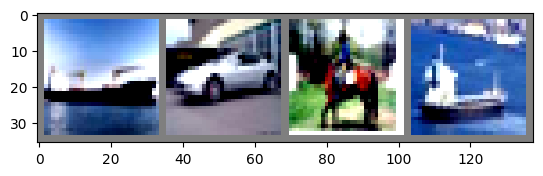

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Training your Pytorch Model

### Prerequisite Code

In [ ]:
#%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


  cat   cat  deer  frog


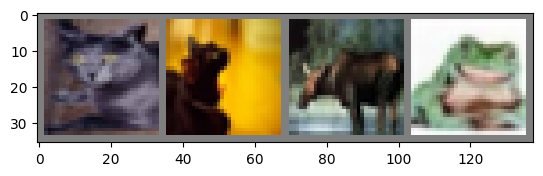

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84,10)


  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x


net = Net()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 1e-3, momentum = 0.9)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.178
[1,  4000] loss: 1.829
[1,  6000] loss: 1.639
[1,  8000] loss: 1.574
[1, 10000] loss: 1.499
[1, 12000] loss: 1.446
[2,  2000] loss: 1.365
[2,  4000] loss: 1.344
[2,  6000] loss: 1.322
[2,  8000] loss: 1.309
[2, 10000] loss: 1.284
[2, 12000] loss: 1.261
Finished Training


`optimizer.zero_grad()` : Zeroing the gradients is an important step. Gradients are accumulated over a batch; if we do not reset them for every batch, they will keep accumulating, which will provide incorrect gradient values, making learning impossible.

`outputs = net(inputs)` : Ask the model for its predictions on this batch.

`loss = criterion(outputs, labels)`: Compute the loss - the difference between outputs (the model prediction) and labels (the correct output).

`loss.backward()` : Do the backward() pass, and calculate the gradients that will direct the learning.

`optimizer.step()` : Optimizer performs one learning step - it uses the gradients from the backward() call to nudge the learning weights in the direction it thinks will reduce the loss.

As a final step, we should check that the model is actually doing general learning, and not simply “memorizing” the dataset. This is called overfitting, and usually indicates that the dataset is too small (not enough examples for general learning), or that the model has more learning parameters than it needs to correctly model the dataset.

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


## Development with TorchScript

https://www.youtube.com/watch?v=Dk88zv1KYMI&t=26s

It is a static, high-performance subset of Python.

1. Prototype your model with Pytorch

2. Control flow is preserved

3. First-class support for lists, dicts, etc.

In [ ]:
import torch
class MyModule(torch.nn.Module):
  def __init__(self, N, M, state:List[Tensor]):
    super(MyModule, self).__init__()
    self.weight = torch.nn.Parameter(torch.rand(N,M))
    self.state = state

  def forward(self, input):
    self.state.append(input)
    if input.sum()>0:
      output = self.weight.mv(input)
    else:
      output = self.weight + input
    return output

my_module = MyModule(3, 4, [torch.rand(3, 4)])
my_script_module = torch.jit.script(my_module)

my_script_module.save("my_script_module.pt")

### Pytorch JIT

It is an optimizing just-in-time compiler for PyTorch programs.

1. Lightweight, thread-safe interpreter

2. Easy to write custom transformations

3. Not just for inference! Autodiff support.

In [ ]:
# How to load an executed torchscript module?

import torch
my_module = torch.jit.load('my_module.pt') # serializer package
my_module(some_input)